In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from statsmodels.tsa.stattools import adfuller

os.chdir('f:/GitHub/icms-prediction/')

os.makedirs('results', exist_ok=True)

assert os.path.exists('data') == True, 'data folder not found. Please create a data folder with data file inside.'

In [3]:
file_name = 'Mini-Consolidado.xlsx'
best_series = ["ARRECADACAO_ICMS_RJ",
               "CESTA_BASICA_RJ",
               "PETROLEO_PRODUCAO_TOTAL",
               "TOTAL_RECEITA_TRIBUTARIA_RJ",
               "ENERGIA_CONSUMO_TOTAL_SUDESTE"]

season = pd.read_excel(f'data/{file_name}', sheet_name='Series', usecols=best_series)
season = season.dropna()
season.head()

,ARRECADACAO_ICMS_RJ,TOTAL_RECEITA_TRIBUTARIA_RJ,ENERGIA_CONSUMO_TOTAL_SUDESTE,PETROLEO_PRODUCAO_TOTAL,CESTA_BASICA_RJ
12,500791406.0,536079641.0,14099.0,914,98.38
13,492921253.0,550874865.0,13559.0,945,99.22
14,520970514.0,589801849.0,13347.0,959,100.36
15,647593104.0,710412306.0,14114.0,950,101.44
16,518649194.0,580797961.0,13849.0,989,101.18


In [4]:
season.shape

(300, 5)

In [5]:
season = season.drop(season.index[192:204])
season.reset_index(drop=True, inplace=True)
season.head()

,ARRECADACAO_ICMS_RJ,TOTAL_RECEITA_TRIBUTARIA_RJ,ENERGIA_CONSUMO_TOTAL_SUDESTE,PETROLEO_PRODUCAO_TOTAL,CESTA_BASICA_RJ
0,500791406.0,536079641.0,14099.0,914,98.38
1,492921253.0,550874865.0,13559.0,945,99.22
2,520970514.0,589801849.0,13347.0,959,100.36
3,647593104.0,710412306.0,14114.0,950,101.44
4,518649194.0,580797961.0,13849.0,989,101.18


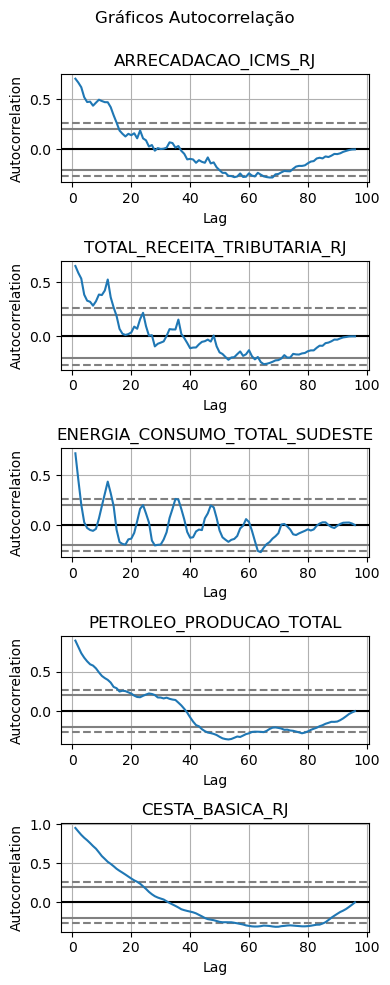

In [6]:
fig, axs = plt.subplots(5, figsize=(4, 10))
fig.suptitle('Gráficos Autocorrelação\n')
for i in range(len(season.columns)):
    ax = axs[i]
    pd.plotting.autocorrelation_plot(season[season.columns[i]][-96:].tolist(), ax=ax)
    ax.set_title(season.columns[i])
    ax.grid(True)
plt.tight_layout()
plt.savefig('imgs/autocorrelation.png')
plt.show()

In [7]:
columns = ["ANO",
           "MES",
           "ARRECADACAO_ICMS_RJ",
           "CESTA_BASICA_RJ",
           "PETROLEO_PRODUCAO_TOTAL",
           "TOTAL_RECEITA_TRIBUTARIA_RJ",
           "ENERGIA_CONSUMO_TOTAL_SUDESTE"]
all_series = pd.read_excel(f'data/{file_name}', sheet_name='Series')
all_series = all_series.dropna()
all_series = all_series.drop(all_series.index[192:204])
trend = all_series[columns].copy()
trend.reset_index(drop=True, inplace=True)
print(trend.shape)
trend.head(216)

(216, 7)


,ANO,MES,ARRECADACAO_ICMS_RJ,CESTA_BASICA_RJ,PETROLEO_PRODUCAO_TOTAL,TOTAL_RECEITA_TRIBUTARIA_RJ,ENERGIA_CONSUMO_TOTAL_SUDESTE
0,2004.0,1.0,1.668433e+09,166.88,1517,1.971915e+09,14930.0
1,2004.0,2.0,9.665576e+08,161.91,1513,1.261818e+09,14715.0
2,2004.0,3.0,8.956950e+08,158.57,1542,1.176546e+09,14904.0
3,2004.0,4.0,9.638028e+08,153.59,1510,1.164562e+09,15501.0
4,2004.0,5.0,9.587682e+08,160.76,1482,1.121692e+09,14907.0
...,...,...,...,...,...,...,...
211,2022.0,8.0,3.409294e+09,717.82,3175,4.139695e+09,20323.0
212,2022.0,9.0,4.297149e+09,714.14,3246,5.058419e+09,20164.0
213,2022.0,10.0,3.404457e+09,736.28,3334,4.107208e+09,20488.0
214,2022.0,11.0,3.622802e+09,749.25,3179,4.355782e+09,20534.0


In [8]:
trend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ANO                            216 non-null    float64
 1   MES                            216 non-null    float64
 2   ARRECADACAO_ICMS_RJ            216 non-null    float64
 3   CESTA_BASICA_RJ                216 non-null    float64
 4   PETROLEO_PRODUCAO_TOTAL        216 non-null    int64  
 5   TOTAL_RECEITA_TRIBUTARIA_RJ    216 non-null    float64
 6   ENERGIA_CONSUMO_TOTAL_SUDESTE  216 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 11.9 KB


In [9]:
# Perform ADF test
for column in trend.columns[2:]:    
    result = adfuller(trend[column].values)
    # Extract p-value from test result
    p_value = result[1]
    # Check if p-value is less than 0.05
    if p_value < 0.05:
        print(f"The p_value is {p_value} and {column} is stationary.")
    else:
        print(f"The p_value is {p_value} and {column} is non-stationary.")

The p_value is 0.7446607289871288 and ARRECADACAO_ICMS_RJ is non-stationary.
The p_value is 0.9905486005626997 and CESTA_BASICA_RJ is non-stationary.
The p_value is 0.9126293221074062 and PETROLEO_PRODUCAO_TOTAL is non-stationary.
The p_value is 0.8061775223277405 and TOTAL_RECEITA_TRIBUTARIA_RJ is non-stationary.
The p_value is 0.3650856138808807 and ENERGIA_CONSUMO_TOTAL_SUDESTE is non-stationary.


In [10]:
no_trend = trend.copy()
for columns in trend.columns[2:]:
    no_trend[columns] = trend[columns].diff(1)
no_trend["CESTA_BASICA_RJ"] = no_trend["CESTA_BASICA_RJ"].diff(1) 
no_trend = no_trend.dropna()

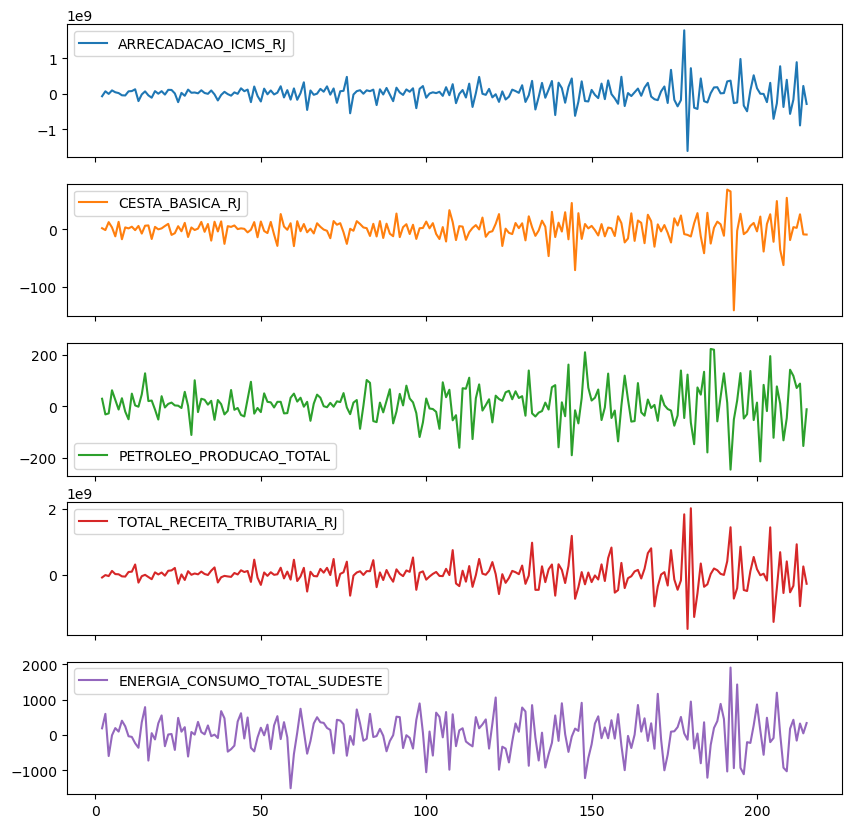

In [11]:
plot = no_trend[no_trend.columns[2:]].plot(figsize=(10, 10), subplots=True)

In [12]:
# Perform ADF test
for column in no_trend.columns[2:]:    
    result = adfuller(no_trend[column].values)
    # Extract p-value from test result
    p_value = result[1]
    # Check if p-value is less than 0.05
    if p_value < 0.05:
        print(f"The p_value is {p_value} and {column} is stationary.")
    else:
        print(f"The p_value is {p_value} and {column} is non-stationary.")

The p_value is 0.0006814116623341757 and ARRECADACAO_ICMS_RJ is stationary.
The p_value is 2.796970883998467e-10 and CESTA_BASICA_RJ is stationary.
The p_value is 2.0640534702965665e-21 and PETROLEO_PRODUCAO_TOTAL is stationary.
The p_value is 0.006407230750350387 and TOTAL_RECEITA_TRIBUTARIA_RJ is stationary.
The p_value is 0.0024150336397935064 and ENERGIA_CONSUMO_TOTAL_SUDESTE is stationary.


In [13]:
no_trend.head()

,ANO,MES,ARRECADACAO_ICMS_RJ,CESTA_BASICA_RJ,PETROLEO_PRODUCAO_TOTAL,TOTAL_RECEITA_TRIBUTARIA_RJ,ENERGIA_CONSUMO_TOTAL_SUDESTE
2,2004.0,3.0,-70862578.0,1.63,29.0,-85272821.0,189.0
3,2004.0,4.0,68107832.0,-1.64,-32.0,-11984003.0,597.0
4,2004.0,5.0,-5034652.0,12.15,-28.0,-42869274.0,-594.0
5,2004.0,6.0,94173068.0,2.99,62.0,113372090.0,-8.0
6,2004.0,7.0,41152389.0,-12.55,25.0,17563732.0,195.0


In [14]:
no_trend.shape

(214, 7)

In [15]:
no_trend.to_csv('data/selected.csv', index=False)

In [16]:
trend[160:200]

,ANO,MES,ARRECADACAO_ICMS_RJ,CESTA_BASICA_RJ,PETROLEO_PRODUCAO_TOTAL,TOTAL_RECEITA_TRIBUTARIA_RJ,ENERGIA_CONSUMO_TOTAL_SUDESTE
160,2017.0,5.0,2.577177e+09,442.56,2768,3.271532e+09,18885.0
161,2017.0,6.0,2.595701e+09,420.35,2794,3.165251e+09,18860.0
162,2017.0,7.0,2.530309e+09,425.62,2734,3.117749e+09,18492.0
163,2017.0,8.0,2.568499e+09,410.43,2676,3.215425e+09,18502.0
164,2017.0,9.0,2.713534e+09,410.27,2766,3.359737e+09,19349.0
165,2017.0,10.0,2.655995e+09,421.05,2742,3.244137e+09,19443.0
166,2017.0,11.0,2.828849e+09,407.37,2705,3.422394e+09,19915.0
167,2017.0,12.0,3.134907e+09,418.71,2731,4.072236e+09,19748.0
168,2018.0,1.0,3.054647e+09,443.81,2724,4.869304e+09,20078.0
169,2018.0,2.0,2.899400e+09,438.36,2729,3.911456e+09,19690.0


In [17]:
# Relação de valores nas datas de 01/2018 até 01/2021 (25 meses)
# Usado para a validação
print(trend['ARRECADACAO_ICMS_RJ'].to_list()[168:193])
print(trend['CESTA_BASICA_RJ'].to_list()[168:193])
print(trend['PETROLEO_PRODUCAO_TOTAL'].to_list()[168:193])
print(trend['TOTAL_RECEITA_TRIBUTARIA_RJ'].to_list()[168:193])
print(trend['ENERGIA_CONSUMO_TOTAL_SUDESTE'].to_list()[168:193])

[3054647241.0, 2899400405.0, 2718750710.0, 2784291530.0, 2988242758.0, 2728014302.0, 3400196101.0, 3228952138.0, 2873691468.0, 2694165362.0, 4479663014.0, 2867019408.0, 3586300282.0, 3192884893.0, 2763545556.0, 3193576905.0, 2983787440.0, 2737799049.08, 2753485166.27, 2931044987.21, 3114528093.4, 3124850205.99, 3143348373.33, 3490147653.84, 3859316053.66]
[443.81, 438.36, 441.19, 440.06, 446.03, 445.58, 421.89, 417.05, 418.48, 443.69, 460.24, 466.75, 460.46, 464.47, 496.33, 515.58, 492.93, 498.67, 479.28, 462.24, 458.21, 462.57, 455.37, 516.91, 644.0]
[2724, 2729, 2672, 2714, 2718, 2707, 2690, 2614, 2578, 2717, 2671, 2794, 2730, 2582, 2655, 2700, 2834, 2654, 2877, 3097, 3038, 3075, 3203, 3216, 2969]
[4869304104.0, 3911455913.0, 3553175853.0, 3557404009.0, 3632787716.0, 3305049163.0, 4047070676.0, 3901651824.0, 3444939721.0, 3272112477.0, 5096900924.0, 3456062224.0, 5464521206.0, 4185558828.0, 3621893885.0, 3959255086.0, 3592748799.0, 3300752325.67, 3321406806.42, 3508106369.08, 3641413

In [18]:
# Ralação de valores em 2022 (12 meses)
# Usado para o teste para readicionar a tendência
# E para comparar o resultado da previsão do modelo
print(trend['ARRECADACAO_ICMS_RJ'].to_list()[-12:])
print(trend['CESTA_BASICA_RJ'].to_list()[-12:])
print(trend['PETROLEO_PRODUCAO_TOTAL'].to_list()[-12:])
print(trend['TOTAL_RECEITA_TRIBUTARIA_RJ'].to_list()[-12:])
print(trend['ENERGIA_CONSUMO_TOTAL_SUDESTE'].to_list()[-12:])

[4327920118.33, 3621238631.11, 3349671547.87, 4123153077.77, 3750000648.34, 4142199873.63, 3574957480.03, 3409293931.52, 4297149120.6, 3404457118.32, 3622801505.3, 3334894194.52]
[692.83, 697.37, 750.71, 768.42, 723.55, 733.14, 723.75, 717.82, 714.14, 736.28, 749.25, 752.74]
[3130, 3007, 3084, 3094, 2961, 2915, 3057, 3175, 3246, 3334, 3179, 3167]
[6324644593.0, 4896229052.55, 4483440975.47, 5163417177.57, 4608586017.03, 5009977516.76, 4476432943.61, 4139695052.02, 5058419403.0, 4107208433.02, 4355782059.66, 4080803807.34]
[20522.0, 20437.0, 21632.0, 21663.0, 20739.0, 19714.0, 19893.0, 20323.0, 20164.0, 20488.0, 20534.0, 20871.0]


In [20]:
#Primeiro mês antes do período de teste
#Usado para readicionar a tendência
print(trend['ARRECADACAO_ICMS_RJ'].to_list()[-13])


4021877984.35
